In [2]:
%matplotlib inline
import numpy as np
import sys

import osh5io
import osh5def 
import osh5vis
import osh5utils
import osh5dir
import matplotlib.pyplot as plt
import pa2d_plot_utilities as papu

In [17]:
base_directory = '/scratch/agrt_root/agrt1/agrt/osiris/Ryan_PA5'
base_directory = '/scratch/agrt_root/agrt1/agrt/osiris/Ryan_PA7'
base_directory = '/scratch/agrt_root/agrt1/agrt/osiris/Ryan_PA8'

#base_directory = '/scratch/agrt_root/agrt1/agrt/osiris/Ryan_PA9'

osh5dir.runinfo(base_directory)

DENSITY
PHA
FLD


In [4]:
# set parameters
nc0_np0 = 100
nd0_np0 = 0.8
kp0Ld0 =1 #0.475
lambda_L0 = 8e-7
lambda_p0 = lambda_L0 * np.sqrt(nc0_np0)
kp0 = 2. * np.pi / lambda_p0
Ld0 = kp0Ld0 / kp0
ramp_start = 5.e-6
ramp_length = 40.e-6
ramp_end = ramp_start + ramp_length
taper_start = ramp_end + 2*lambda_p0

L_interact = 0.1*120e-3
z_max = (L_interact + ramp_length)
Npoints = 1000
xi_min = -8.0*np.pi/kp0
posramp0 =  0#3/kp0 #20e-6- 1/kp0
xi_max = 1.0*np.pi/kp0+posramp0
xi = np.linspace(xi_min,xi_max,Npoints)

def drive_dens_func(z):
    n = np.zeros_like(z)
    #n = np.exp(-(z)**2/Ld0**2)
    n[(z<0)*(z>-Ld0)] = 1
    #L = (10*np.pi/2)*1.125
    #Aw = 0.413
    #L=1
    #Aw=1 #0.78*np.sqrt(2/L)
    #n[(z<0)*(z>-Ld0*L)] = Aw*abs(z[(z<0)*(z>-Ld0*L)]/Ld0/L)
    #n[(z<0)*(z>-Ld0)] = z[(z<0)*(z>-Ld0)]
    return n

def calc_wake(xi,nd):
    Npoints = xi.size
    dxi=xi[2] - xi[1]
    dn = np.zeros_like(xi)
    E = np.zeros_like(xi)
    for ii in np.arange((Npoints - 3),-1,-1):
        A = -3/4/(1 + 2*dn[ii+1])
        B = (1 - 2*A*dn[ii+2])
        C = dn[ii+2]*(1 + A*dn[ii+2]) - 2*dn[ii+1] + dxi**2*(1 + 2*dn[ii+1])**1.5*(dn[ii+1]+nd[ii+1])
        
        #if ((0.5*B/A)**2-C/A) > 0:
        dn[ii] = -0.5*B/A - np.sqrt((0.5*B/A)**2-C/A)
        #else:
        #    dndxi = (dn[ii+2]-dn[ii+1])/dxi
        #    dn[ii]=-dn[ii+2]+2.0*dn[ii+1] + dxi**2 * (3*dndxi**2/(1+2*dn[ii+1]) \
        #                                              - (1+2*dn[ii+1])**1.5*(dn[ii+1] + nd[ii+1]))
        E[ii] = E[ii+1] + (dn[ii+1]+nd[ii+1]) * dxi
    return dn,E
nd = nd0_np0/2*drive_dens_func(xi/(10*np.pi/2))

#x1 = ofs #1219.02
#n0_0 = 0.2590 + 1.6164 / (85.1675 + (x1 - 31))**0.1740

#nd = nd0_np0*drive_dens_func(xi-posramp0)
#(dn,E) = (calc_wake(kp0*xi,nd))
#(dn,E) = (calc_wake(np.sqrt(n0_0)*kp0*xi,nd/n0_0))
#plt.plot(kp0*xi,n0_0*dn,kp0*xi,-n0_0*E,kp0*xi,nd)

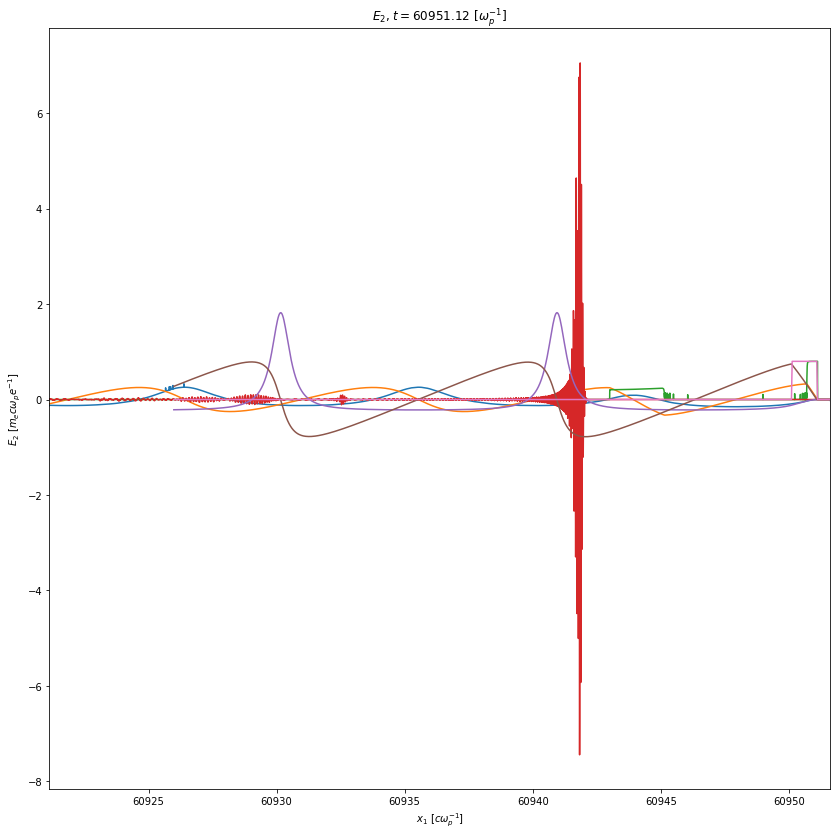

In [12]:
filenum =50 #185#460

species = 'plasma'
field = 'charge'
(field_name,fldmap) = osh5dir.getfieldname(base_directory,field,species,'')
e1 = osh5dir.getfile(field_name,filenum)
plt.figure(figsize=(14,14))
osh5vis.osplot(-e1+e1[-2])
field = 'e1'
(field_name,fldmap) = osh5dir.getfieldname(base_directory,field,species,'')
e1 = osh5dir.getfile(field_name,filenum)
osh5vis.osplot(e1)
species = 'driver'
field = 'charge'
(field_name,fldmap) = osh5dir.getfieldname(base_directory,field,species,'')
charge = osh5dir.getfile(field_name,filenum)
osh5vis.osplot(-charge)
field = 'e2'
(field_name,fldmap) = osh5dir.getfieldname(base_directory,field,species,'')
e2 = osh5dir.getfile(field_name,filenum)
osh5vis.osplot(e2/10)
ofs = e2.run_attrs.get('TIME')[0] #2438.04 #12190.22 #1219.02
x1 = ofs #1219.02
n0_0 = 0.2590 + 1.6164 / (85.1675 + (x1 - 31))**0.1740

nd = nd0_np0*drive_dens_func(xi-posramp0)
(dn,E) = (calc_wake(kp0*xi,nd))
(dn,E) = (calc_wake(np.sqrt(n0_0)*kp0*xi,nd/n0_0))
plt.plot(kp0*xi+ofs,n0_0*dn,kp0*xi+ofs,np.sqrt(n0_0)*E,kp0*xi+ofs,nd)
#plt.xlim(ofs+kp0*xi_min,ofs+kp0*xi_max)
#plt.xlim(-5.6,-5)

(<matplotlib.image.AxesImage at 0x14b31edaefa0>,
 <matplotlib.colorbar.Colorbar at 0x14b31ed612b0>)

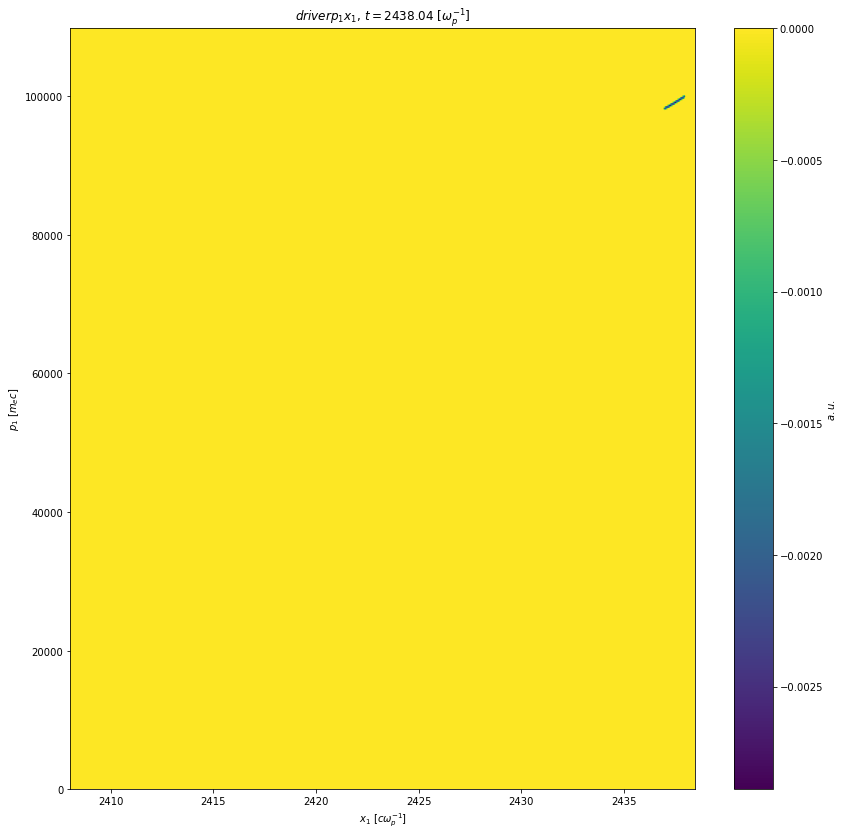

In [18]:
species = 'driver'
filenum =2
field = 'p1x1'
(field_name,fldmap) = osh5dir.getfieldname(base_directory,field,species,'')
data = osh5dir.getfile(field_name,filenum)
plt.figure(figsize=(14,14))
osh5vis.osplot(data)


In [8]:
field = 'e2'
(t,omega,data,om_max,om_mean) = papu.get_spectrum_v_time(base_directory,field,species,180)#185) #447)

generating spectrum v time data


100%|██████████| 180/180 [00:08<00:00, 20.45it/s]


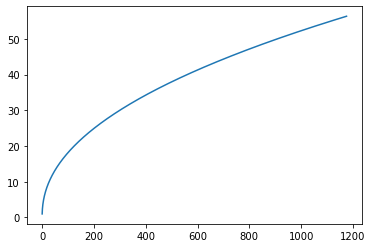

In [9]:
(t_out,om_predict) = papu.get_theory_curve(t/(0.236),100,2.36e15)

plt.plot(t_out/1e15*3e8/1e-3,om_predict)

In [10]:
def myplot(t,omega,data,om_max,om_mean,t_out,om_predict):
    %matplotlib inline
    
    # constants
    nc0_np0 = 100
    om0 = 2.36e15
    omp = om0/np.sqrt(nc0_np0)
    
    plt.figure(figsize=(14,9))
    extent = (t[0]/omp*3e8/1e-3,t[-1]/omp*3e8/1e-3,omega[0]/np.sqrt(nc0_np0),omega[-1]/np.sqrt(nc0_np0))
    total_spectra_plot = plt.imshow(data,origin='lower',aspect='auto',extent=extent)#,clim=(0,50))
    plt.colorbar(total_spectra_plot,ax=plt.gca())
    plt.plot(t/omp*3e8/1e-3,om_max/np.sqrt(nc0_np0),'k',t/omp*3e8/1e-3,om_mean/np.sqrt(nc0_np0),'k--')
    plt.plot(t_out/1e15*3e8/1e-3,om_predict,'r')
    plt.ylim((0,70))
    plt.xlim((0,max(t/omp*3e8/1e-3)))
    #plt.xlim((0,1))
    plt.xlabel('z [mm]')
    plt.ylabel(r'$\omega/\omega_0$')
    plt.show

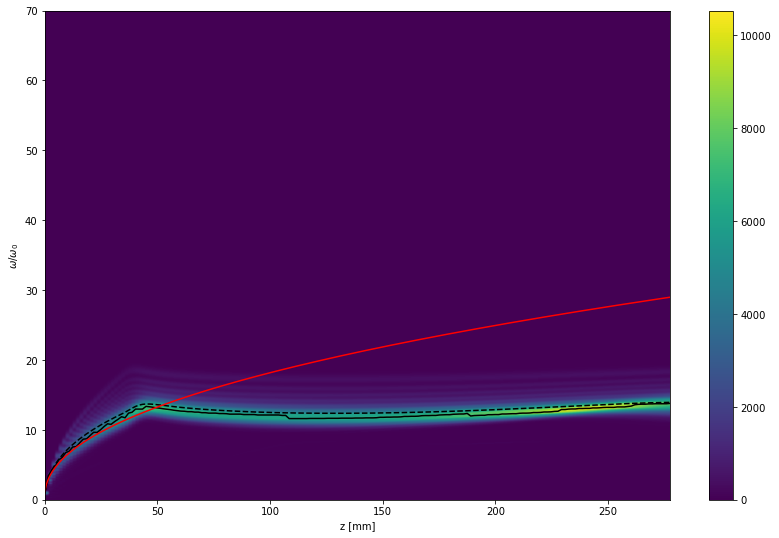

In [11]:
myplot(t,omega,data,om_max,om_mean,t_out,om_predict)

In [61]:
def myplot_omhalf(t,omega,data,om_max,om_mean,t_out,om_predict):
    %matplotlib inline
    
    # constants
    nc0_np0 = 25
    om0 = 2.36e15
    omp = om0/np.sqrt(nc0_np0)
    
    plt.figure(figsize=(8,2))
    extent = (t[0]/omp*3e8/1e-3,t[-1]/omp*3e8/1e-3,omega[0]/np.sqrt(nc0_np0),omega[-1]/np.sqrt(nc0_np0))
    total_spectra_plot = plt.imshow(data/max(data[:,1]),origin='lower',aspect='auto',extent=extent,interpolation='nearest',cmap='magma')#,clim=(0,50))
    cbar = plt.colorbar(total_spectra_plot,ax=plt.gca())
    cbar.set_label(r'$dI/d\omega$ [normalized]')
    plt.plot(t/omp*3e8/1e-3,om_mean/np.sqrt(nc0_np0),'b--',t/omp*3e8/1e-3,om_max/np.sqrt(nc0_np0),'b')
   # plt.plot(t/omp*3e8/1e-3,om_mean/np.sqrt(nc0_np0),'k--')
    plt.plot(t_out/1e15*3e8/1e-3,om_predict,'g')
    plt.ylim((0,70))
    plt.xlim((0,max(t/omp*3e8/1e-3)))
    plt.xlim((0,120))
    plt.xlabel('z [mm]')
    plt.ylabel(r'$\omega/\omega_0$')
    plt.legend((r'$\langle\omega/\omega_0\rangle$',r'$\left|\omega/\omega_0\right|_\infty$','analytic'))
    plt.show

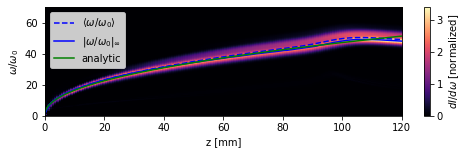

In [62]:

nc0_np0 = 25
om0 = 2.36e15
#(t_out,om_predict) = papu.get_theory_curve(t/(0.236*2),nc0_np0,om0)
myplot_omhalf(t,omega,data,om_max,om_mean,t_out,om_predict)
plt.savefig("final_1d_sim.pdf", dpi=150)

In [17]:
species = 'driver'
field = 'ene'
(t,data_d) = papu.get_time_history(base_directory,field,species,180)
species = 'driver'
field = 'e2'
(t,data_l) = papu.get_time_history(base_directory,field,species,180)
species = 'driver'
field = 'e1'
(t,data_w) = papu.get_time_history(base_directory,field,species,180)
species = 'plasma'
field = 'ene'
(t,data_p) = papu.get_time_history(base_directory,field,species,180)

generating spectrum v time data


100%|██████████| 180/180 [00:28<00:00,  6.39it/s]


generating spectrum v time data


100%|██████████| 180/180 [00:25<00:00,  7.18it/s]


generating spectrum v time data


100%|██████████| 180/180 [00:29<00:00,  6.17it/s]


generating spectrum v time data


100%|██████████| 180/180 [00:32<00:00,  5.51it/s]


/tmp/ipykernel_854620/1871369911.py:17: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t,(total_pulse_energy-total_pulse_energy[0])/(total_beam_energy[0]-total_beam_energy))


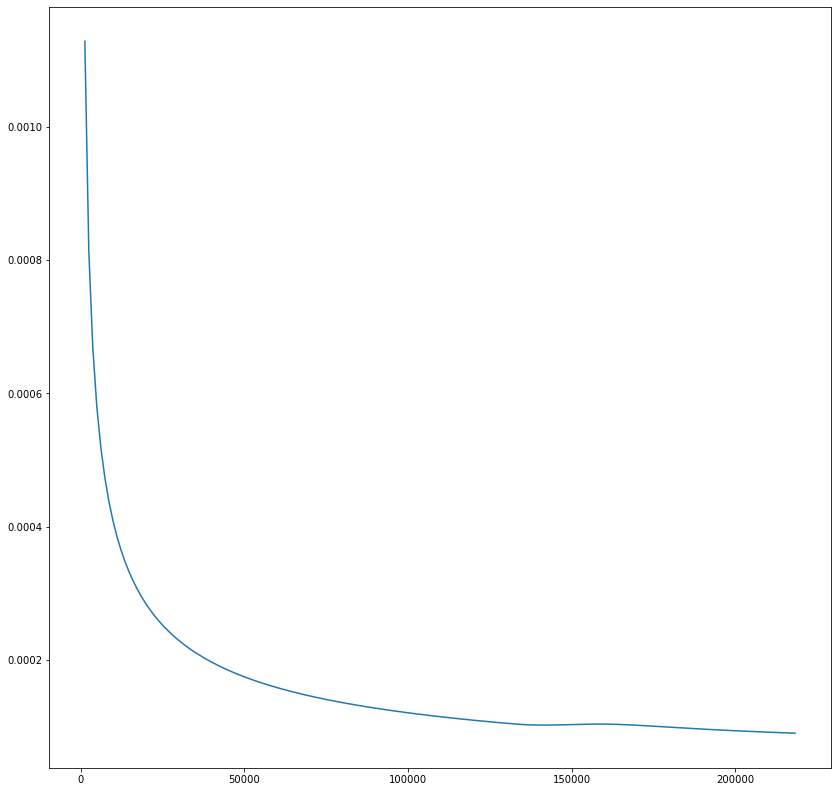

In [23]:
plt.figure(figsize=(14,14))
# constants
nc0_np0 = 25
om0 = 2.36e15
omp = om0/np.sqrt(nc0_np0)
#extent = (t[0]/omp*3e8/1e-3,t[-1]/omp*3e8/1e-3,99000,110000)
#data0 = (np.ones_like(data2)).T * data[:,0]
#total_spectra_plot = plt.imshow((data2-data0.T)/100000*100,origin='lower',aspect='auto',clim=(-100,0),extent=extent)
#total_spectra_plot = plt.imshow(data2,origin='lower',aspect='auto',extent=extent)
#plt.colorbar(total_spectra_plot,ax=plt.gca())
total_beam_energy = sum(data_d,1)
total_pulse_energy = sum(data_l**2,1)
total_wakefield_energy = sum(data_w**2,1)
total_plasma_energy = sum(data_p,1)
#plt.plot(t,total_beam_energy,t,total_pulse_energy,t,total_wakefield_energy,t,total_plasma_energy)
#plt.plot(t,total_beam_energy,t,total_pulse_energy*1000)
plt.plot(t,(total_pulse_energy-total_pulse_energy[0])/(total_beam_energy[0]-total_beam_energy))

(0.0, 20.0)

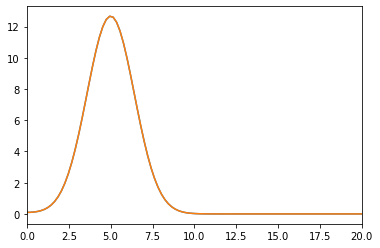

In [35]:
%matplotlib inline
l = 1

plt.plot(omega,data[:,0],omega,data[:,l])

plt.xlim(0,20)

In [26]:
ls

basic_examples.ipynb           osh5io_dummy.py
charge_time_series.ipynb       osh5io.py
docs/                          osh5utils.py
fields.json                    osh5utils_q3d.py
final_1d_sim.pdf               osh5visipy.py
independent_timeframe_pptm.py  osh5vis.py
ipywidgets_examples.ipynb      pa2d_plot_utilities.py
LICENSE.txt                    playground/
nonlinear_functions.py         poynting_flux_example.py
os_analysis_compare.ipynb      __pycache__/
os_analysis_worksheet.ipynb    README.md
osh5def.py                     setup.py
osh5dir.py                     time_series_workbook.ipynb
osh5gui.py
